# Exercicis per practicar amb regressions.

## Exercici 1
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.



## Exercici 2
Compara’ls en base al MSE i al R2.



## Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.



## Exercici 4
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).



## Exercici 5
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

# Previo a los ejercicios. Preprocesado de los datos

En un primer lugar, procedo a cargar y preprocesar los datos. Estos mismos datos fueron trabajados en la tarea M5 T02, así que algunas partes del código serán comunes.

He dedicado mucho tiempo a esta parte de la actividad. Aunque no se pedía de forma específica, creo que es de las cosas que más han afectado durante todas las pruebas que he hecho.

**ATENCIÓN**: Este código está hecho para ejecutarse paso a paso, ya que hay nombres que se repiten. Cuando tenga tiempo lo resubiré mejor explicado y sin repetir partes.

In [3]:
import pandas as pd

house = pd.read_csv("housing_data.csv",  
                  names=["CRIM", "ZN", "INDUS", "RIVER", "NOX","RM", "PRIOR40s","DIS", "RAD", "TAX","PTRATIO","BLA","LSTAT","MEDV"])

house.head()

,CRIM,ZN,INDUS,RIVER,NOX,RM,PRIOR40s,DIS,RAD,TAX,PTRATIO,BLA,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   RIVER     506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   PRIOR40s  506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    float64
 10  PTRATIO   506 non-null    float64
 11  BLA       506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Quitar outliers

En un primer lugar, voy a proceder a quitar los outliers. Para ello, usaré la distancia intercuartil (IQ), estimando como outlier aquellos puntos que se encuentren a más de 1.5xIQ pasado el primer / tercer cuartil. 

In [5]:
Q1 = house.quantile(0.25)
Q3 = house.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM          3.595038
ZN           12.500000
INDUS        12.910000
RIVER         0.000000
NOX           0.175000
RM            0.738000
PRIOR40s     49.050000
DIS           3.088250
RAD          20.000000
TAX         387.000000
PTRATIO       2.800000
BLA          20.847500
LSTAT        10.005000
MEDV          7.975000
dtype: float64


In [6]:
import numpy as np

outliers_house=(house < (Q1 - 1.5 * IQR)) | (house > (Q3 + 1.5 * IQR)) 
#encuentro los valores outliers, que se guardan en formato boolean
#print(outliers_house)

out_hous=np.asarray(outliers_house) #paso a array
print(out_hous)
np.where(out_hous) #busco en qué posiciones hay outliers

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


(array([ 18,  25,  27,  32,  34,  39,  40,  54,  55,  56,  57,  65,  66,
         97,  97,  98,  98, 102, 118, 134, 141, 142, 145, 146, 151, 152,
        152, 153, 154, 154, 155, 155, 156, 157, 160, 160, 161, 162, 162,
        162, 163, 163, 163, 165, 166, 166, 167, 168, 169, 170, 179, 180,
        180, 182, 186, 186, 187, 188, 189, 190, 190, 191, 192, 193, 194,
        195, 195, 195, 196, 196, 197, 197, 198, 198, 199, 200, 201, 202,
        202, 203, 203, 203, 204, 204, 204, 208, 209, 210, 211, 212, 216,
        218, 219, 220, 221, 222, 224, 224, 225, 225, 226, 226, 228, 232,
        232, 233, 233, 234, 236, 253, 253, 254, 255, 256, 256, 257, 257,
        257, 258, 259, 260, 261, 261, 262, 262, 262, 263, 264, 265, 266,
        267, 267, 267, 268, 268, 269, 273, 274, 274, 275, 276, 276, 277,
        277, 278, 280, 280, 282, 282, 283, 283, 283, 283, 284, 285, 286,
        286, 287, 288, 289, 290, 291, 291, 292, 298, 299, 300, 301, 302,
        303, 304, 305, 306, 307, 331, 332, 341, 343

In [7]:
#No obstante, en el apartado anterior se nos guardan como F todos los puntos que NO son outliers. Para que sea más 
#sencillo, lo haré de manera opuesta, y guardaré los resultados en un dataframe nuevo.

house_noout = house[~((house < (Q1 - 1.5 * IQR)) |(house > (Q3 + 1.5 * IQR))).any(axis=1)]
house_noout.info() #Me he quedado con 268 valores!!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      268 non-null    float64
 1   ZN        268 non-null    float64
 2   INDUS     268 non-null    float64
 3   RIVER     268 non-null    int64  
 4   NOX       268 non-null    float64
 5   RM        268 non-null    float64
 6   PRIOR40s  268 non-null    float64
 7   DIS       268 non-null    float64
 8   RAD       268 non-null    int64  
 9   TAX       268 non-null    float64
 10  PTRATIO   268 non-null    float64
 11  BLA       268 non-null    float64
 12  LSTAT     268 non-null    float64
 13  MEDV      268 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 31.4 KB


Como puede verse, si "atacamos" toda la base de datos en busca de outliers perdemos muchos registros (ya que estamos extrayendo todos los registros que contienen al menos un outlier en una de sus columnas).

Por tanto, decido seguir otra aproximación: ya que vamos a predecir los datos de precio de las casas, me centraré en eliminar los registros que contienen outliers en esa columna, ya que es lo que más puede afectar de cara a la predicción. Lo hago así:

In [8]:

Q1 = house['MEDV'].quantile(0.25)
Q3 = house['MEDV'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

house_MEDVout = house[((house['MEDV'] > (Q1 - 1.5 * IQR)) & (house['MEDV'] < (Q3 + 1.5 * IQR)))]
house_MEDVout.info()

#Observamos que en este caso hemos eliminado solo 40 registros

7.975000000000001
<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      466 non-null    float64
 1   ZN        466 non-null    float64
 2   INDUS     466 non-null    float64
 3   RIVER     466 non-null    int64  
 4   NOX       466 non-null    float64
 5   RM        466 non-null    float64
 6   PRIOR40s  466 non-null    float64
 7   DIS       466 non-null    float64
 8   RAD       466 non-null    int64  
 9   TAX       466 non-null    float64
 10  PTRATIO   466 non-null    float64
 11  BLA       466 non-null    float64
 12  LSTAT     466 non-null    float64
 13  MEDV      466 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 54.6 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x1be662c3220>,
 'caps': [<matplotlib.lines.Line2D at 0x1be662c37c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1be662b6f10>],
 'medians': [<matplotlib.lines.Line2D at 0x1be662c3d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1be662d0070>],
 'means': []}

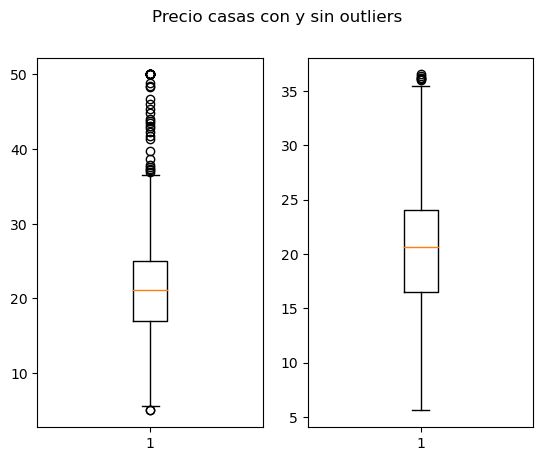

In [9]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Precio casas con y sin outliers')
ax2.boxplot(house_MEDVout["MEDV"])
ax1.boxplot(house["MEDV"])


Y en este último gráfico veríamos una comparativa previo a la extracción de outliers y posterior

# Normalizar

He hecho pruebas previas utilizando robust scaler, pero apenas normalizaba, así que procedo a usar nuevamente con quantile. Usaré un escalador para la variable y y otro para las x, de manera en que una vez realizada la predicción pueda volver atrás para inferir los valores reales.

Realizaré dos normalizaciones: Una para los datos con outliers y otra para los datos sin outliers. De esta manera podré comprobar qué preprocesado funciona mejor

C:\Users\rakel\AppData\Local\Temp\ipykernel_14860\2686393410.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  house_MEDVout.hist(ax=ax) #Resultados previos. La base de datos con outliers es muy similar, excepto para MEDV


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'RIVER'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'PRIOR40s'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'BLA'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

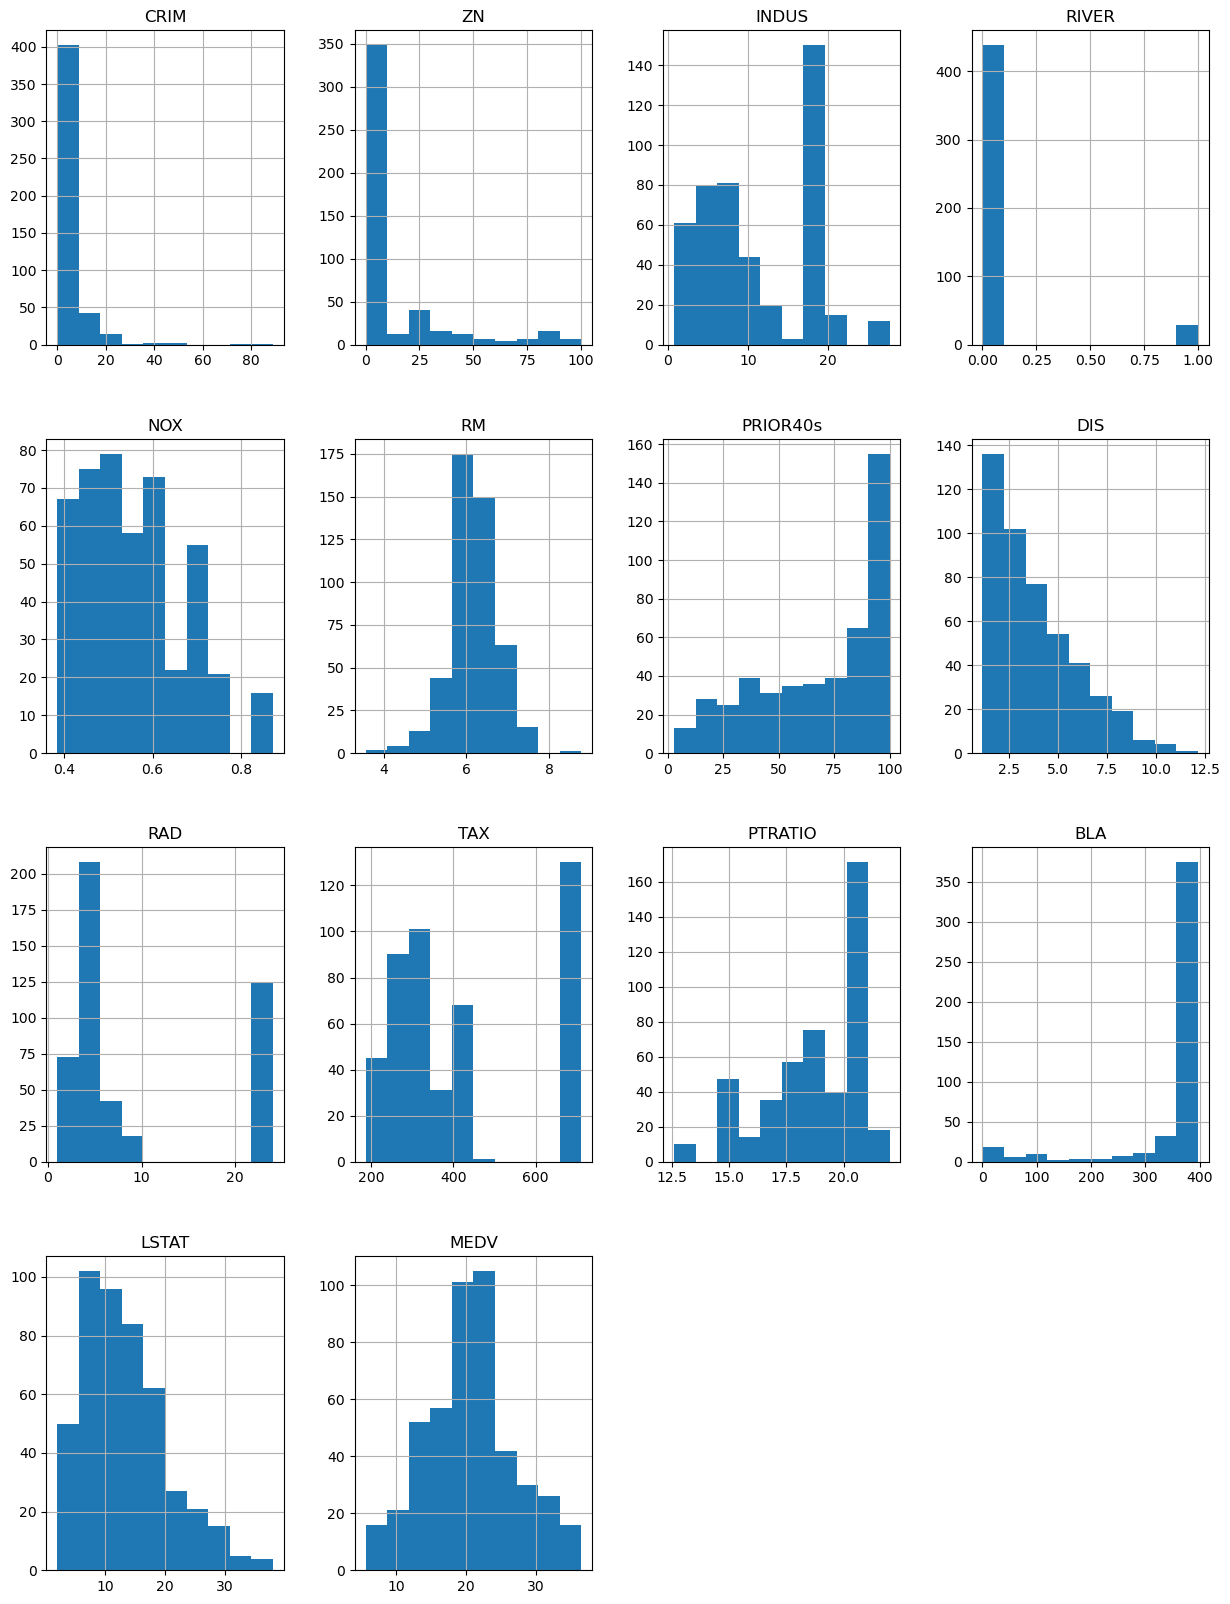

In [10]:
fig = plt.figure(figsize = (15,20)) #Tamaño figura
ax = fig.gca()
house_MEDVout.hist(ax=ax) #Resultados previos. La base de datos con outliers es muy similar, excepto para MEDV


C:\Users\rakel\AppData\Local\Temp\ipykernel_14860\915161633.py:24: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_X_trans.hist(ax=ax) #Veamos que al menos las variables X se han normalizado


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'RIVER'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'PRIOR40s'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'BLA'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

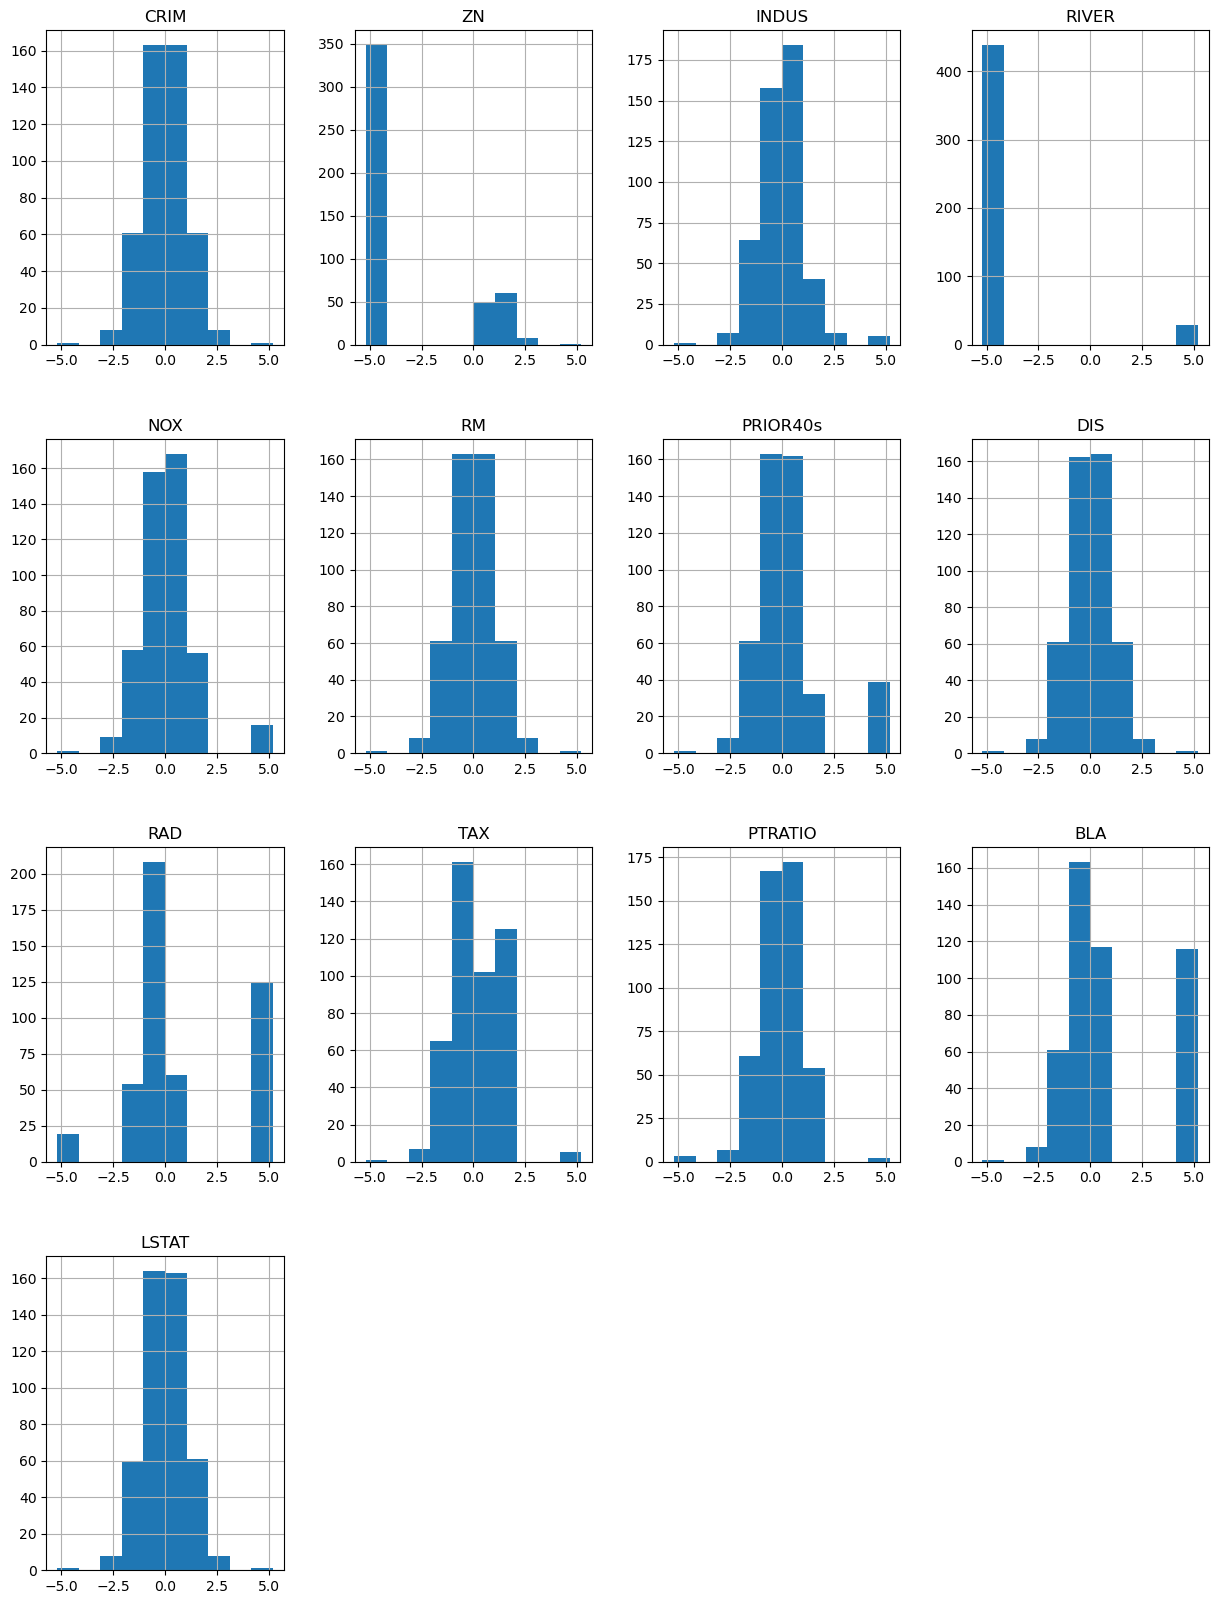

In [25]:
#Normalizando la base de datos (SIN OUTLIERS)

from sklearn import preprocessing
import numpy as np

X1 = house_MEDVout.drop(columns=['MEDV'])  #normalizo por un lado las variables X
Y1 = np.asarray(house_MEDVout['MEDV']).reshape(-1,1) #Y por otro la variable Y

scalerx = preprocessing.QuantileTransformer(n_quantiles=400,output_distribution='normal')
x_scaled = scalerx.fit_transform(X1)

scalery = preprocessing.QuantileTransformer(n_quantiles=400,output_distribution='normal')
y_scaled = scalery.fit_transform(Y1)

df_X_trans = pd.DataFrame(x_scaled) #El output es en numpy, vuelvo de nuevo a transformarlo a dataframe
df_X_trans.columns = ["CRIM", "ZN", "INDUS", "RIVER", "NOX","RM", "PRIOR40s","DIS", "RAD", "TAX","PTRATIO","BLA","LSTAT"]

df_Y_trans = pd.DataFrame(y_scaled) #El output es en numpy, vuelvo de nuevo a transformarlo a dataframe
df_Y_trans.columns = ["MEDV"]


fig2 = plt.figure(figsize = (15,20)) #Tamaño figura
ax = fig2.gca()
df_X_trans.hist(ax=ax) #Veamos que al menos las variables X se han normalizado


Ha funcionado, así que ahora proceso a normalizar la base de datos que **SI** contiene outliers

C:\Users\rakel\AppData\Local\Temp\ipykernel_14860\3445500128.py:19: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_X_trans1.hist(ax=ax)


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'RIVER'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'PRIOR40s'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'BLA'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

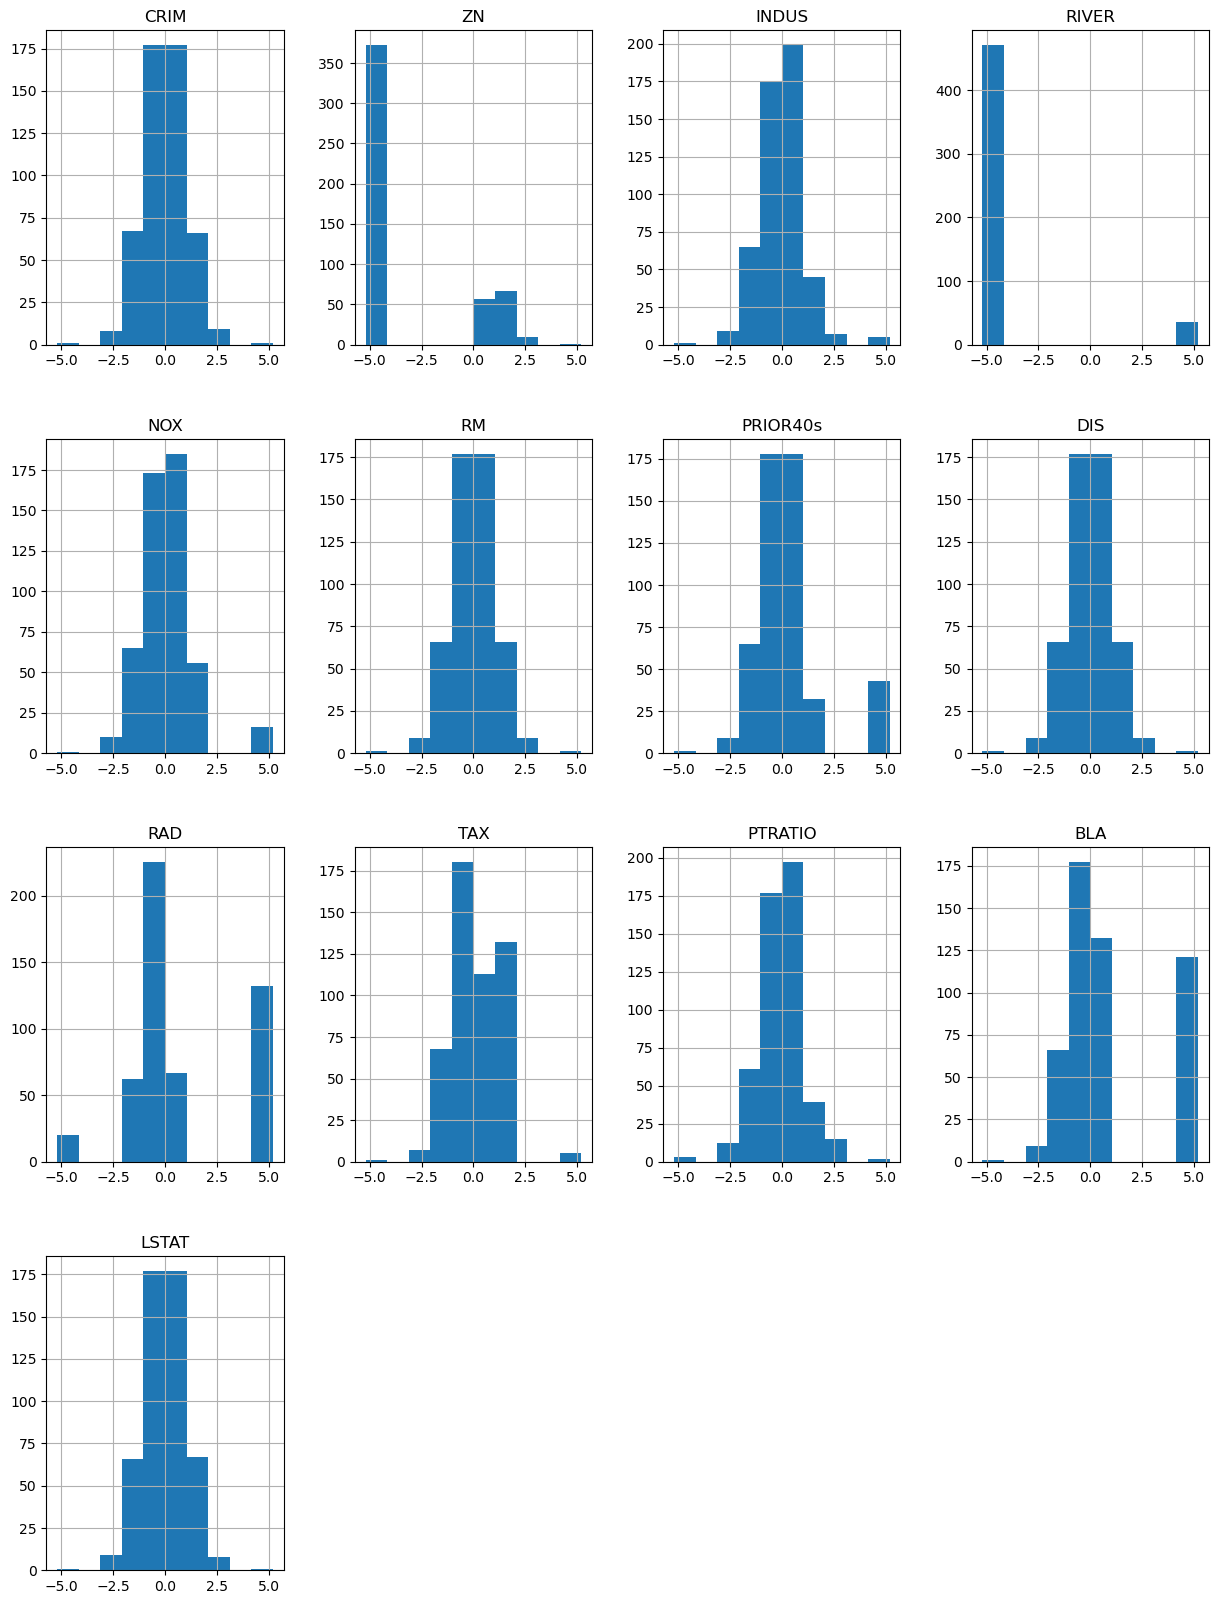

In [26]:
X2 = house.drop(columns=['MEDV'])  #
Y2 = np.asarray(house['MEDV']).reshape(-1,1)

scalerx1 = preprocessing.QuantileTransformer(n_quantiles=400,output_distribution='normal')
x_scaled1 = scalerx1.fit_transform(X2)

scalery1 = preprocessing.QuantileTransformer(n_quantiles=400,output_distribution='normal')
y_scaled1 = scalery1.fit_transform(Y2)

df_X_trans1 = pd.DataFrame(x_scaled1) #El output es en numpy, vuelvo de nuevo a transformarlo a dataframe
df_X_trans1.columns = ["CRIM", "ZN", "INDUS", "RIVER", "NOX","RM", "PRIOR40s","DIS", "RAD", "TAX","PTRATIO","BLA","LSTAT"]

df_Y_trans1 = pd.DataFrame(y_scaled1) #El output es en numpy, vuelvo de nuevo a transformarlo a dataframe
df_Y_trans1.columns = ["MEDV"]


fig2 = plt.figure(figsize = (15,20)) #Tamaño figura
ax = fig2.gca()
df_X_trans1.hist(ax=ax) 

# EJERCICIOS 1 Y 2:

- Genera al menos 2 modelos lineales de predicción
- Compáralos usando MSE y R2


## Efecto del preprocesado y modelo lineal 1 (Linear regression)

Empezaré ajustando un modelo de regresión lineal a los siguientes datasets que he ido generando:
    1. Dataset NO transformado
    2. Dataset transformado CON outliers
    3. Dataset transformado SIN outliers

### 1. Modelo lineal con el raw data

In [27]:
from sklearn.linear_model import LinearRegression

X = house.drop(columns=['MEDV'])  
Y = house['MEDV']  

linear_regressor = LinearRegression()  # create object for the class
model = linear_regressor.fit(X, Y)  # perform linear regression
Y_pred1 = linear_regressor.predict(X)  # make predictions

r_sq = model.score(X, Y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7406426641094095


Observamos que la R2 de hecho es bastante elevada. Pero veamos el MSE y el resto de parámetros:

In [28]:
print('MSE:',mean_squared_error(Y,Y_pred1))

MSE: 21.894831181729202


In [29]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 17 Nov 2022   Prob (F-statistic):          6.72e-135
Time:                        18:02:05   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

Necesitamos generar otros modelos para poder comparar. Vayamos al siguiente:

### 2. Modelo lineal datos transformados


In [30]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()  # create object for the class
model = linear_regressor.fit(df_X_trans1, df_Y_trans1) # perform linear regression
Y_pred = linear_regressor.predict(df_X_trans1)  # make predictions

r_sq = model.score(df_X_trans1, df_Y_trans1)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.675659410282168


In [31]:
import statsmodels.api as sm

X2 = sm.add_constant(df_X_trans1)
est = sm.OLS(df_Y_trans1, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     78.84
Date:                Thu, 17 Nov 2022   Prob (F-statistic):          3.14e-111
Time:                        18:02:08   Log-Likelihood:                -576.73
No. Observations:                 506   AIC:                             1181.
Df Residuals:                     492   BIC:                             1241.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3925      0.096      4.071      0.0

In [32]:
print('MSE:',mean_squared_error(df_Y_trans1,Y_pred))

MSE: 0.5721837329280227


Como podemos observar, la R2 es ligeramente inferior a la que obtenemos con el Raw Data (0.74 vs 0.67). No obstante, el **MSE** es muy inferior (21.89 vs 0.57).

Veamos cómo se ven los valores predichos vs los reales. Emmpecemos con el caso del raw data:

Text(0, 0.5, 'Predicted Y')

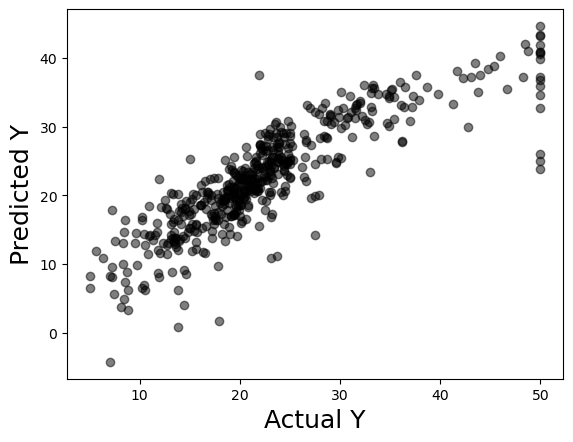

In [33]:
plt.scatter(Y, Y_pred1, color = 'k', alpha=0.5)
plt.xlabel('Actual Y', fontsize=18)
plt.ylabel('Predicted Y', fontsize=18)


Y ahora seguimos con los datos normalizados: 

Text(0, 0.5, 'Predicted Y')

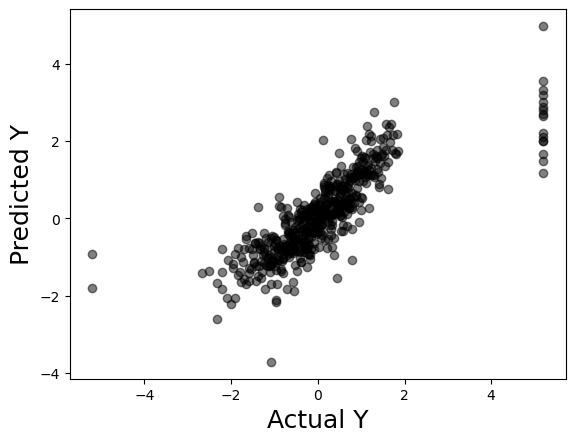

In [35]:
plt.scatter(df_Y_trans1, Y_pred, color = 'k', alpha=0.5)
plt.xlabel('Actual Y', fontsize=18)
plt.ylabel('Predicted Y', fontsize=18)


Los puntos están mucho más centrados, lo que da lugar a menor dispersión y menor error! Veamos con el último dataset:

### 2. Modelo lineal datos transformados

In [36]:
linear_regressor = LinearRegression()  
model = linear_regressor.fit(df_X_trans, df_Y_trans)  
Y_pred = linear_regressor.predict(df_X_trans)  

r_sq = model.score(df_X_trans, df_Y_trans)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.700508723874913


In [37]:
X3 = sm.add_constant(df_X_trans)
est = sm.OLS(df_Y_trans, X3)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     81.33
Date:                Thu, 17 Nov 2022   Prob (F-statistic):          2.19e-109
Time:                        18:03:04   Log-Likelihood:                -400.27
No. Observations:                 466   AIC:                             828.5
Df Residuals:                     452   BIC:                             886.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1557      0.080      1.938      0.0

In [38]:

print('MSE:',mean_squared_error(df_Y_trans,Y_pred))


MSE: 0.3262835096591562


**VARIAS COSAS**:

    - MSE menor que en los casos anteriores
    - R2 mayor que cuando tenemos los datos tan solo transformados
    
Veamos cómo se ven los valores predecidos vs reales:

Text(0, 0.5, 'Predicted Y')

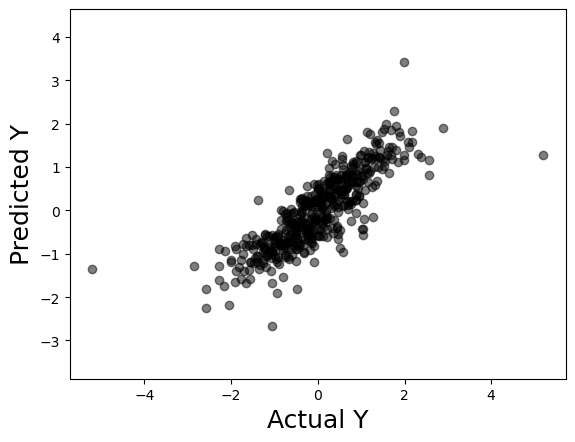

In [39]:
plt.scatter(df_Y_trans, Y_pred, color = 'k', alpha=0.5)
plt.axis('equal')
plt.xlabel('Actual Y', fontsize=18)
plt.ylabel('Predicted Y', fontsize=18)

Parece que lo tenemos! Aunque esta parte no se pedía explícitamente, creo que me ha permitido entender mejor cómo funcionan los modelos y la importancia del preprocesado. 

Por tanto, me quedaré con los datos **sin outliers y normalizados**. A continuación, proceso a calibrar otro modelo. En este caso, he decidido probar Random Forest:

In [129]:
# Para volver a los valores originales, se debería usar inverse_transform(X)

## Modelo lineal 2: Random forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Variables que queremos predecir
Y_forst = np.array(df_Y_trans['MEDV'])
#print(Y_forst)
feature_list = list(df_X_trans.columns) #nombres
#Variables predictoras:
X_forst = np.array(df_X_trans)


In [41]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_forst, Y_forst);
predictions = rf.predict(X_forst)
# Calculate the absolute errors
errors = abs(predictions - Y_forst)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print('MSE:',mean_squared_error(Y_forst,predictions))

Mean Absolute Error: 0.12 degrees.
MSE: 0.032791090177635304


In [42]:
# Calcular el mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_forst)
# Accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.56 %.


In [43]:
rf.feature_importances_

array([0.07009483, 0.00147431, 0.01238943, 0.00101122, 0.03602119,
       0.18660527, 0.03104571, 0.04331301, 0.00404329, 0.02790965,
       0.01887285, 0.0206822 , 0.54653703])

<BarContainer object of 13 artists>

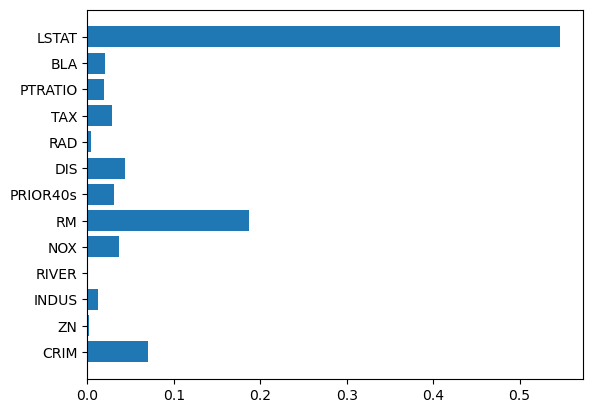

In [230]:
plt.barh(df_X_trans.columns, rf.feature_importances_) #Características que tienen más importancia en el modelo:

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

print("Coefficient of determination: %.5f" % r2_score(Y_forst, predictions))

Coefficient of determination: 0.96990


Text(0, 0.5, 'Predicted Y')

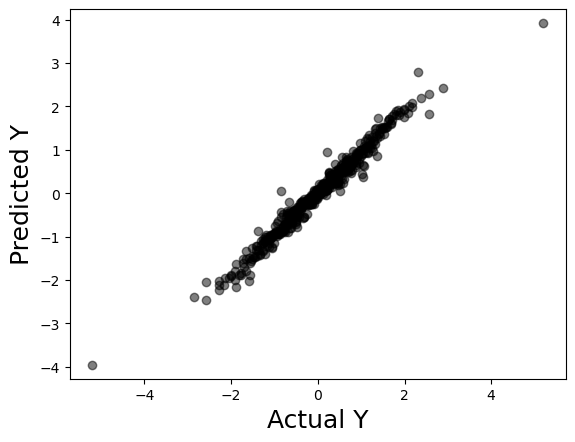

In [45]:
plt.scatter(Y_forst, predictions, color = 'k', alpha=0.5)
plt.axis('equal')
plt.xlabel('Actual Y', fontsize=18)
plt.ylabel('Predicted Y', fontsize=18)

Parece que el modelo funciona MUY bien. La MSE es aún más pequeña que en el caso anterior, y la R2 parece muy alta. En estos plots podemos ver también las variables que tienen más efecto en el modelo.

La verdad es que el modelo funciona tan bien que sospecho que es probable que haya algo mal ?

# EJERCICIO 3: TRAIN / TEST SUBSET

Vamos a repetir los modelos anteriores pero usando subsets de train / test. Para ello haré split del dataset sin outliers. Después volveré a normalizar: 

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.30, random_state=33)


scalerx = preprocessing.QuantileTransformer(n_quantiles=400,output_distribution='normal')
x_scaled_train = scalerx.fit_transform(X_train)
x_scaled_test = scalerx.fit_transform(X_test)

scalery = preprocessing.QuantileTransformer(n_quantiles=400,output_distribution='normal')
y_scaled_train = scalery.fit_transform(y_train)
y_scaled_test = scalery.fit_transform(y_test)


df_X_test = pd.DataFrame(x_scaled_test) #El output es en numpy, vuelvo de nuevo a transformarlo a dataframe
df_X_test.columns = ["CRIM", "ZN", "INDUS", "RIVER", "NOX","RM", "PRIOR40s","DIS", "RAD", "TAX","PTRATIO","BLA","LSTAT"]
df_X_train = pd.DataFrame(x_scaled_train) #El output es en numpy, vuelvo de nuevo a transformarlo a dataframe
df_X_train.columns = ["CRIM", "ZN", "INDUS", "RIVER", "NOX","RM", "PRIOR40s","DIS", "RAD", "TAX","PTRATIO","BLA","LSTAT"]



df_Y_test = pd.DataFrame(y_scaled_test) #El output es en numpy, vuelvo de nuevo a transformarlo a dataframe
df_Y_test.columns = ["MEDV"]
df_Y_train = pd.DataFrame(y_scaled_train) #El output es en numpy, vuelvo de nuevo a transformarlo a dataframe
df_Y_train.columns = ["MEDV"]


C:\Users\rakel\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (400) is greater than the total number of samples (326). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\rakel\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (400) is greater than the total number of samples (140). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\rakel\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (400) is greater than the total number of samples (326). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\rakel\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (400) is greater than the total number of samples (140). n_quantiles is set to n_samples.
  warnings.warn(


Sale un warning pero no es preocupante

## 1. REGRESION LINEAL

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

linear_regressor = LinearRegression()  # create object for the class
model = linear_regressor.fit(x_scaled_train, y_scaled_train)

# perform linear regression
Y_pred = linear_regressor.predict(x_scaled_test)  # make predictions

print("Mean squared error: %.4f" % mean_squared_error(y_scaled_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_scaled_test, Y_pred))

Mean squared error: 0.6300
Coefficient of determination: 0.52


Text(0, 0.5, 'Predicted Y')

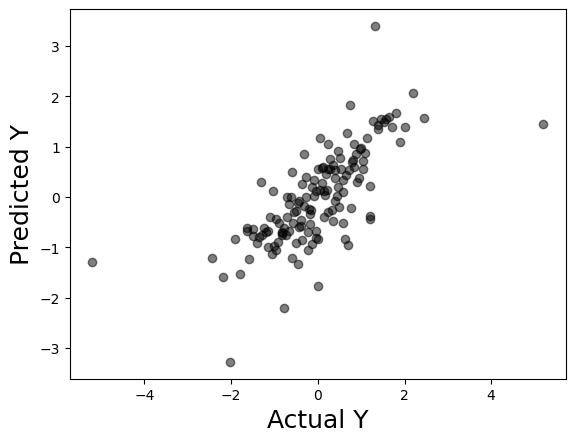

In [48]:
plt.scatter(y_scaled_test, Y_pred, color = 'k', alpha=0.5)
plt.xlabel('Actual Y', fontsize=18)
plt.ylabel('Predicted Y', fontsize=18)

In [49]:
y_new_inverse = scalery.inverse_transform(Y_pred)
#print(y_new_inverse)
#print(y_test)

## 2. Random Forest

In [50]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)


Y_forst_train = np.array(df_Y_train['MEDV'])
X_forst_train = np.array(df_X_train)
Y_forst_test = np.array(df_Y_test['MEDV'])
X_forst_test = np.array(df_X_test)

# Train the model on training data
rf.fit(X_forst_train, Y_forst_train);

predictions = rf.predict(X_forst_test)
print(predictions)
print(Y_forst_test)

# Calculate the absolute errors
errors = abs(predictions - Y_forst_test)
r2 = r2_score(Y_forst_test, predictions)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print('MSE:',mean_squared_error(Y_forst_test,predictions))
print('R-squared scores:', round(r2, 2))


[ 1.66868756  0.21140898  0.23649849  0.0739691   1.89311059  0.49795585
 -0.65080697 -0.77332415  0.12891527 -0.06371119  1.24990589  0.17436854
  0.2283458   1.04876288  0.02157676  0.73867598 -0.88603673  0.91930187
  0.0603188   1.21188456  0.3017653  -1.24548832 -0.65623395 -0.99908194
  0.01369291 -1.05041831  1.92532704 -0.60791837 -0.00863456  0.00439508
 -1.05019997  0.29948664  0.80153574 -0.2383777   0.81164024 -1.38577494
 -1.11433997  0.61798686  0.01970934 -0.65093636 -0.78579212  0.12194975
 -0.18442539 -2.07480256 -0.13558294  1.03758177  0.27332988 -0.27310967
 -0.86856524 -0.36168583 -1.00021081  1.32845548  1.89696847 -0.11474265
  0.01878547 -1.42984201  1.42487704 -0.76682854  1.41878602  1.7044562
 -1.16646701  0.08511634  0.97091133 -0.94580708  0.04802019  0.10849895
 -0.99512255  0.02390218 -0.96583179 -0.20871594  0.11768841 -0.63322128
 -0.92114178 -0.64794268 -0.28053569  0.53608901 -0.03972183 -0.59943089
 -0.15141043  1.53486398 -1.19421354  0.65090123  0.

In [51]:
from sklearn.model_selection import GridSearchCV #Esto permite mejorar los parámetros del modelo

# Find the best parameters for the model
parameters = {
    'max_depth': [60,70, 80, 90, 100,120],
    'n_estimators': [600,900, 1000, 1100,1300,1500]
}
gridforest = GridSearchCV(rf, parameters, cv = 3, n_jobs = -1, verbose = 1)
gridforest.fit(X_forst_train, Y_forst_train)
gridforest.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


{'max_depth': 60, 'n_estimators': 1500}

In [52]:
rf = RandomForestRegressor(n_estimators = 1500, max_depth=60, random_state = 42)

# Train the model on training data
rf.fit(X_forst_train, Y_forst_train);

predictions = rf.predict(X_forst_test)
print(predictions)
print(Y_forst_test)

# Calculate the absolute errors
errors = abs(predictions - Y_forst_test)
r2 = r2_score(Y_forst_test, predictions)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print('MSE:',mean_squared_error(Y_forst_test,predictions))
print('R-squared scores:', round(r2, 2))

[ 1.65537935  0.21598314  0.23049555  0.07413819  1.88819195  0.48957304
 -0.65067392 -0.77704686  0.12861425 -0.05952272  1.24820984  0.18332287
  0.23290817  1.04708535  0.03272187  0.74068643 -0.88796603  0.9343172
  0.06295571  1.20973196  0.30754802 -1.23928269 -0.65334114 -0.99573312
  0.00952579 -1.05150747  1.92164337 -0.60816819 -0.01462739  0.00671884
 -1.0467903   0.30160607  0.80253433 -0.23936669  0.81529471 -1.38512443
 -1.12249957  0.61461462  0.01990853 -0.65475868 -0.78813651  0.11787466
 -0.18290974 -2.09308617 -0.13428776  1.0507325   0.2768021  -0.27465957
 -0.88011024 -0.35879172 -0.9977381   1.32173553  1.90567395 -0.11916958
  0.01029228 -1.44043455  1.42943393 -0.76747185  1.41869813  1.70290772
 -1.16347506  0.08685532  0.93413307 -0.9479099   0.0444192   0.10874423
 -0.98983564  0.02123787 -0.96016628 -0.21046265  0.10722963 -0.63685279
 -0.91724849 -0.64975327 -0.27995202  0.53412466 -0.0321104  -0.59636197
 -0.15067616  1.53267601 -1.20297174  0.64997427  0.

Text(0, 0.5, 'Predicted Y')

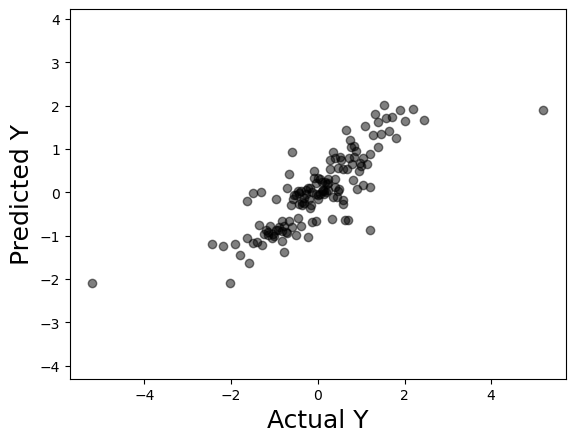

In [53]:
plt.scatter(Y_forst_test, predictions, color = 'k', alpha=0.5)
plt.axis('equal')
plt.xlabel('Actual Y', fontsize=18)
plt.ylabel('Predicted Y', fontsize=18)

In [54]:
from sklearn.model_selection import cross_val_predict

rfr = RandomForestRegressor(n_estimators = 1500,max_depth=60, random_state = 42)
# Train the model on training data
rfr.fit(X_forst, Y_forst);

predictions = cross_val_predict(rfr, X_forst, Y_forst, cv=10)
# Calculate the absolute errors
errors = abs(predictions - Y_forst)
r2 = r2_score(Y_forst, predictions)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print('MSE:',mean_squared_error(Y_forst,predictions))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 0.4 degrees.
MSE: 0.3370938672593028
R-squared scores: 0.69


Text(0, 0.5, 'Predicted Y')

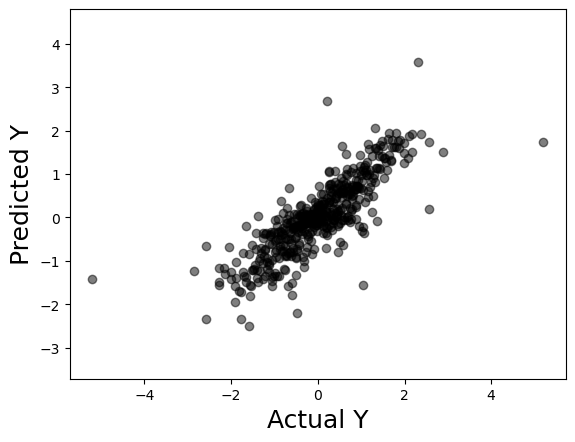

In [55]:
plt.scatter(Y_forst, predictions, color = 'k', alpha=0.5)
plt.axis('equal')
plt.xlabel('Actual Y', fontsize=18)
plt.ylabel('Predicted Y', fontsize=18)

<BarContainer object of 13 artists>

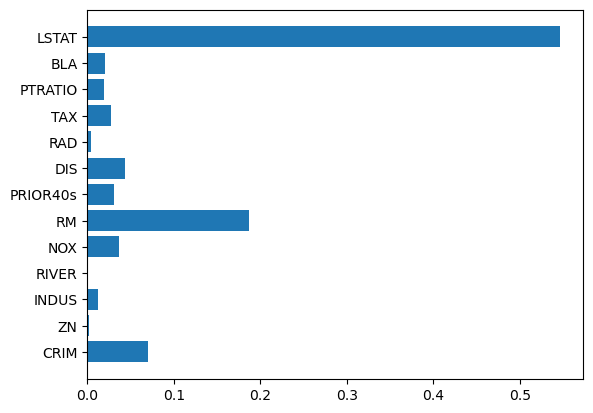

In [56]:
plt.barh(df_X_trans.columns, rfr.feature_importances_) #Características que tienen más importancia en el modelo:

Observamos que los resultados mejoran cuando usamos todo el dataset (con una cross validación). Esto se debe a que el modelo tiene más datos para entrenarse. Hay que tener en cuenta que 500 entradas está bien, pero si hacemos un split de train test perdemos una parte proporcional importante de los datos

# EJERCICIO 4: DROP RM

Para intentar no repetir demasiado, haré solo una prueba sencilla con el dataset ya transformado, quitándo la columna de RM y viendo qué sucede con el modelo.

Como hemos visto en apartados anteriores, RM es una de las variables que más influye en la predicción

In [292]:
df_X_trans_RM = df_X_trans.drop(['RM'],axis=1)
df_X_trans_RM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      466 non-null    float64
 1   ZN        466 non-null    float64
 2   INDUS     466 non-null    float64
 3   RIVER     466 non-null    float64
 4   NOX       466 non-null    float64
 5   PRIOR40s  466 non-null    float64
 6   DIS       466 non-null    float64
 7   RAD       466 non-null    float64
 8   TAX       466 non-null    float64
 9   PTRATIO   466 non-null    float64
 10  BLA       466 non-null    float64
 11  LSTAT     466 non-null    float64
dtypes: float64(12)
memory usage: 43.8 KB


In [293]:
linear_regressor = LinearRegression()  
model = linear_regressor.fit(df_X_trans_RM, df_Y_trans)  
Y_pred = linear_regressor.predict(df_X_trans_RM)  

r_sq = model.score(df_X_trans_RM, df_Y_trans)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.6912566796067419


In [294]:
X3 = sm.add_constant(df_X_trans_RM)
est = sm.OLS(df_Y_trans, X3)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     84.52
Date:                Thu, 17 Nov 2022   Prob (F-statistic):          2.09e-107
Time:                        17:47:47   Log-Likelihood:                -407.36
No. Observations:                 466   AIC:                             840.7
Df Residuals:                     453   BIC:                             894.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1809      0.081      2.227      0.0

In [296]:
print('MSE:',mean_squared_error(df_Y_trans,Y_pred))


MSE: 0.33636323389820194


Observo que, aparentemente, no cambia mucho. Al haber otras variables influyentes (especialmente LSTAT), es posible que compensen la carencia de esta variable